In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

dataset =pd.read_csv('cars.csv')

X = dataset.iloc[:,0:5]
Y = dataset.iloc[:,5]

Y = Y[:,np.newaxis]

scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()

print(scaler_X.fit(X))
xscale=scaler_X.transform(X)

print(scaler_Y.fit(Y))
yscale=scaler_Y.transform(Y)

X_train, X_test, y_train, y_test = train_test_split(xscale, yscale)

MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))


In [34]:
model = Sequential()
model.add(Dense(12,input_dim = 5,kernel_initializer='normal',activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='linear'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 12)                72        
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 185
Trainable params: 185
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.compile(loss='mse',optimizer='adam',metrics=['mse'])

history = model.fit(X_train,y_train,epochs=150,batch_size=50,verbose=1,validation_split=0.2)

Train on 577 samples, validate on 145 samples
Epoch 1/150
577/577 [==============================] - 0s 604us/sample - loss: 0.2383 - mse: 0.2383 - val_loss: 0.2096 - val_mse: 0.2096
Epoch 2/150
577/577 [==============================] - 0s 40us/sample - loss: 0.2108 - mse: 0.2108 - val_loss: 0.1875 - val_mse: 0.1875
Epoch 3/150
577/577 [==============================] - 0s 45us/sample - loss: 0.1881 - mse: 0.1881 - val_loss: 0.1684 - val_mse: 0.1684
Epoch 4/150
577/577 [==============================] - 0s 45us/sample - loss: 0.1676 - mse: 0.1676 - val_loss: 0.1509 - val_mse: 0.1509
Epoch 5/150
577/577 [==============================] - 0s 42us/sample - loss: 0.1493 - mse: 0.1493 - val_loss: 0.1346 - val_mse: 0.1346
Epoch 6/150
577/577 [==============================] - 0s 43us/sample - loss: 0.1308 - mse: 0.1308 - val_loss: 0.1189 - val_mse: 0.1189
Epoch 7/150
577/577 [==============================] - 0s 43us/sample - loss: 0.1138 - mse: 0.1138 - val_loss: 0.1047 - val_mse: 0.1047
E

577/577 [==============================] - 0s 43us/sample - loss: 0.0107 - mse: 0.0107 - val_loss: 0.0136 - val_mse: 0.0136
Epoch 120/150
577/577 [==============================] - 0s 44us/sample - loss: 0.0106 - mse: 0.0106 - val_loss: 0.0138 - val_mse: 0.0138
Epoch 121/150
577/577 [==============================] - 0s 45us/sample - loss: 0.0106 - mse: 0.0106 - val_loss: 0.0138 - val_mse: 0.0138
Epoch 122/150
577/577 [==============================] - 0s 45us/sample - loss: 0.0106 - mse: 0.0106 - val_loss: 0.0136 - val_mse: 0.0136
Epoch 123/150
577/577 [==============================] - ETA: 0s - loss: 0.0216 - mse: 0.021 - 0s 40us/sample - loss: 0.0106 - mse: 0.0106 - val_loss: 0.0135 - val_mse: 0.0135
Epoch 124/150
577/577 [==============================] - 0s 40us/sample - loss: 0.0106 - mse: 0.0106 - val_loss: 0.0138 - val_mse: 0.0138
Epoch 125/150
577/577 [==============================] - 0s 40us/sample - loss: 0.0106 - mse: 0.0106 - val_loss: 0.0138 - val_mse: 0.0138
Epoch 126/

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


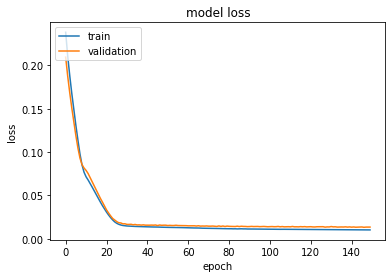

In [37]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()